In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from statsmodels.tools.eval_measures import rmse


import warnings
warnings.filterwarnings('ignore')

### Import a Dataset

In [2]:
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
data= series.loc['Z8RsBpxhnkebK5fvahVCmfV7icO2']

In [4]:
data.head()

,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
uid,,,,,,,,,,,,,,
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:15:00,72.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:30:00,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:45:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 01:00:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 01:15:00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data =data.reset_index()

In [6]:
data = data.drop(['uid','time'], axis=1)

In [7]:
data = data.fillna(0)

In [8]:
data = data.drop(data[data.sugarValue < 1].index, inplace=False)

In [9]:
float_col = data.select_dtypes(include=['float64']) # This will select float columns only
#list(float_col.columns.values)
for col in float_col.columns.values:
        data[col] = data[col].astype('int64')

### The final dataset will be: 

In [10]:
data

,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,77,0,0,0,0,0,90,0,0,0,0,0,0
824,75,49,0,0,0,0,90,0,0,0,0,0,0
825,73,71,0,0,0,0,86,0,0,0,0,0,0
826,89,650,0,0,0,0,82,0,0,0,0,0,0
827,97,393,0,0,0,0,79,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,0,0,0,0,0,0,102,0,0,0,0,0,0
2095,0,0,0,0,0,0,102,0,0,0,0,0,0
2096,0,0,0,0,0,0,108,0,0,0,0,0,0
2097,0,0,0,0,0,0,105,0,0,0,0,0,0


### Let’s create our model. We are trying to predict a patient diabetes value. This coincides with the ‘sugarValue’ column, which will be our independent variable. We’ll use all the other columns as features for our model.

In [11]:
X = data.drop('sugarValue', axis=1)
y = data['sugarValue']

### We’ll use train-test-split to split the data into training data and testing data, and create a random forest model.


### PSW 24hours


In [12]:
n=96 ##24h
v=1 #
#df = dataSugar

window = pd.DataFrame(columns=['Current train', 'Current test', 'RMSE'])

for x in range(len(data)-n-v):
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)
    
    X_train = X.iloc[x:n]
    X_test = X.iloc[n:n+v]
    y_train = y.iloc[x:n]
    y_test = y.iloc[n:n+v]

#indces for the train test split
   # random forest model creation
 
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    
    #print("Current train value: ",X_train)
    #print("Current  test value: ",X_test)
    #print("Original value: ",y_train)
    #print("Predicted value: ",rfc_predict)
    #print("RMSE : ", rmse(y_test, rfc_predict))
    
    window = window.append({'Current train': "From: "+str(y_train.index[0]) +" to: " + str(y_train.index[-1]) , 'Current test':"From: "+str(y_test.index[0]) +" to: " + str(y_test.index[-1]), 'RMSE': rmse(y_test, rfc_predict)},ignore_index=True)
    n=n+1


In [13]:
n=96 ##24h
v=2 #15 Min and 30 Min
#df = dataSugar

window2 = pd.DataFrame(columns=['Current train', 'Current test', 'RMSE'])

for x in range(len(data)-n-v):
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)
    
    X_train = X.iloc[x:n]
    X_test = X.iloc[n:n+v]
    y_train = y.iloc[x:n]
    y_test = y.iloc[n:n+v]

#indces for the train test split
   # random forest model creation
 
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    
    #print("Current train value: ",X_train)
    #print("Current  test value: ",X_test)
    #print("Original value: ",y_train)
    #print("Predicted value: ",rfc_predict)
    #print("RMSE : ", rmse(y_test, rfc_predict))
    
    window2 = window2.append({'Current train': "From: "+str(y_train.index[0]) +" to: " + str(y_train.index[-1]) , 'Current test':"From: "+str(y_test.index[0]) +" to: " + str(y_test.index[-1]), 'RMSE': rmse(y_test, rfc_predict)},ignore_index=True)
    n=n+1

In [18]:
n=96 ##24h
v=3 #15 Min, 30 Min and 45 Min
#df = dataSugar

window3 = pd.DataFrame(columns=['Current train', 'Current test', 'RMSE'])

for x in range(len(data)-n-v):
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)
    
    X_train = X.iloc[x:n]
    X_test = X.iloc[n:n+v]
    y_train = y.iloc[x:n]
    y_test = y.iloc[n:n+v]

#indces for the train test split
   # random forest model creation
 
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    
    #print("Current train value: ",X_train)
    #print("Current  test value: ",X_test)
    #print("Original value: ",y_train)
    #print("Predicted value: ",rfc_predict)
    #print("RMSE : ", rmse(y_test, rfc_predict))
    
    window3 = window3.append({'Current train': "From: "+str(y_train.index[0]) +" to: " + str(y_train.index[-1]) , 'Current test':"From: "+str(y_test.index[0]) +" to: " + str(y_test.index[-1]), 'RMSE': rmse(y_test, rfc_predict)},ignore_index=True)
    n=n+1

In [19]:
n=96 ##24h
v=4 #15 Min, 30 Min , 45 Min and 60 Min
#df = dataSugar

window4 = pd.DataFrame(columns=['Current train', 'Current test', 'RMSE'])

for x in range(len(data)-n-v):
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)
    
    X_train = X.iloc[x:n]
    X_test = X.iloc[n:n+v]
    y_train = y.iloc[x:n]
    y_test = y.iloc[n:n+v]

#indces for the train test split
   # random forest model creation
 
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    
    #print("Current train value: ",X_train)
    #print("Current  test value: ",X_test)
    #print("Original value: ",y_train)
    #print("Predicted value: ",rfc_predict)
    #print("RMSE : ", rmse(y_test, rfc_predict))
    
    window4 = window4.append({'Current train': "From: "+str(y_train.index[0]) +" to: " + str(y_train.index[-1]) , 'Current test':"From: "+str(y_test.index[0]) +" to: " + str(y_test.index[-1]), 'RMSE': rmse(y_test, rfc_predict)},ignore_index=True)
    n=n+1

In [20]:
d = {'RMSE': window["RMSE"], 'Interval': ["15 Min"]*len(window["RMSE"])}
df = pd.DataFrame(data=d)

d2 = {'RMSE': window2["RMSE"], 'Interval': ["30 Min"]*len(window2["RMSE"])}
df2 = pd.DataFrame(data=d2)

d3 = {'RMSE': window3["RMSE"], 'Interval': ["45 Min"]*len(window3["RMSE"])}
df3 = pd.DataFrame(data=d3)

d4 = {'RMSE': window4["RMSE"], 'Interval': ["60 Min"]*len(window4["RMSE"])}
df4 = pd.DataFrame(data=d4)

df= df.append(df2).append(df3).append(df4)

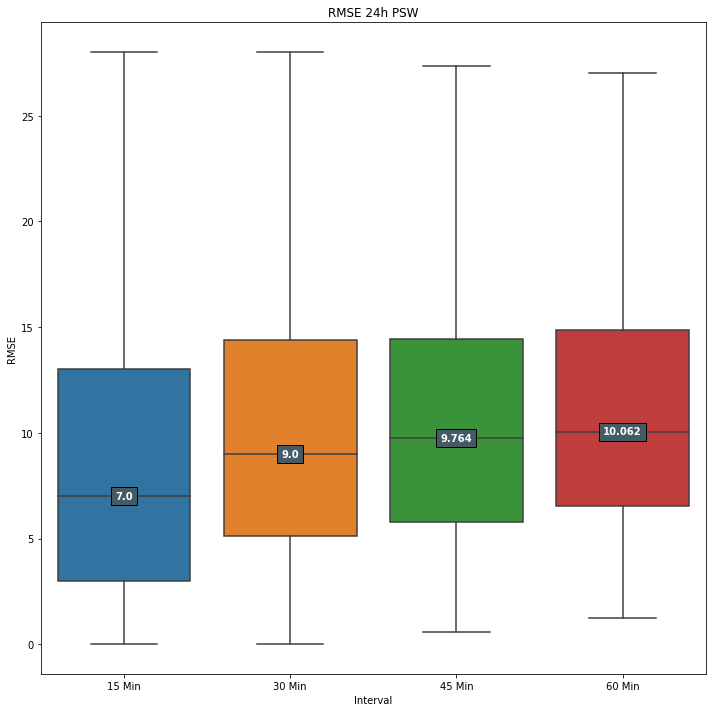

In [22]:
box_plot_data=[window["RMSE"],window2["RMSE"],window3["RMSE"],window4["RMSE"]]

plt.figure(figsize=(10, 10))
plt.title("RMSE 24h PSW")
plt.ylabel("RMSE")
plt.xlabel("")


box_plot = sns.boxplot(x="Interval" ,y="RMSE" ,data=df, showfliers = False)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*5].get_ydata()[0],3) 
    
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    

box_plot.figure.tight_layout()